In [170]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import plotly.express as px
import random
import time
import itertools
import math
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [171]:
LENGTH=200
WIDE=50

GANTT_CHART = pd.DataFrame({
    'M1':np.zeros(LENGTH),
    'M2':np.zeros(LENGTH),
    'M3':np.zeros(LENGTH),
    'M4':np.zeros(LENGTH)},
    index = [np.arange(1,LENGTH+1)],dtype=int)
#print(gantt_chart)

OPERATION = pd.DataFrame({
    'job':np.zeros(WIDE),
    'process':np.zeros(WIDE)},
    index = [np.arange(1,WIDE+1)],dtype=int)

In [172]:
#JOBSET7初期解生成
best_t=9999 #最短时间设定

MS_J7=np.array([[1,4,-1],
               [2,4,-1],
               [2,4,-1],
               [3,4,-1],
               [1,3,-1],
               [2,3,4],
               [1,2,3],
               [1,2,4]])

T_J7=np.array([[6,6,-1],
               [11,9,-1],
               [9,7,-1],
               [16,7,-1],
               [9,18,-1],
               [13,19,6],
               [10,9,13],
               [11,9,8]])
    
gantt_chart_J7=pd.DataFrame({
    'M1':np.zeros(LENGTH),
    'M2':np.zeros(LENGTH),
    'M3':np.zeros(LENGTH),
    'M4':np.zeros(LENGTH)},
    index = [np.arange(1,LENGTH+1)],dtype=int)

operation_J7=pd.DataFrame({
    'job':np.zeros(WIDE),
    'process':np.zeros(WIDE)},
    index = [np.arange(1,WIDE+1)],dtype=int)
    
state_M=np.zeros(4,dtype=int)
state_J7=np.zeros(8,dtype=int)
check_J7=np.array([[0,0,-1],
                    [0,0,-1],
                    [0,0,-1],
                    [0,0,-1],
                    [0,0,-1],
                    [0,0,0],
                    [0,0,0],
                    [0,0,0],]) 

o=1
    
for t in np.arange(1,LENGTH+1):
    if np.any(state_M==0) and np.any(state_J7==0):
        for j in np.arange(0,8):
            if state_J7[j]==0:
                for i in np.arange(0,3):
                    if check_J7[j,i]==0 and state_J7[j]==0:
                        if i==0 or (i>0 and check_J7[j,i-1]==1):
                            m=MS_J7[j,i]-1
                            if state_M[m]==0:
                                state_M[m]=T_J7[j,i]
                                state_J7[j]=T_J7[j,i]
                                check_J7[j,i]=1
                                gantt_chart_J7.iloc[t-1:t-1+T_J7[j,i],m]=j+1
                                operation_J7.loc[o,'job']=j+1
                                operation_J7.loc[o,'process']=i+1
                                o+=1
    state_M[state_M !=0] -= 1
    state_J7[state_J7 !=0] -= 1
    if np.all(check_J7!=0):
        break
   
for t in np.arange(1,LENGTH+1):
    if np.all(gantt_chart_J7.iloc[t-1,:]==0):    
        break

best_t=t
best_gantt_chart_J7=gantt_chart_J7

best_operation_J7=pd.DataFrame({
    'job':np.zeros(o-1),
    'process':np.zeros(o-1)},
    index = [np.arange(1,o)],dtype=int)

for i in np.arange(1,o):
    best_operation_J7.loc[i,'job']=operation_J7.loc[i,'job']
    best_operation_J7.loc[i,'process']=operation_J7.loc[i,'process']
    
#if t < best_t:
    #best_t=t
    #best_gantt_chart_J7=gantt_chart_J7
    #best_operation_J7=operation_J7

#print(list_time_J7)
#print('ジョブ7の初期解ガントチャート:\n',best_gantt_chart_J7)
print('ジョブ7の初期解操作順番:\n',best_operation_J7) 
print('ジョブ7の初期解処理時間:\n',best_t,'時刻')        
        
#raw_data1=best_gantt_chart_J7
#np.savetxt(fname='d:/pysrc/data/gantt_chart_J7.csv',X=raw_data1,fmt='%0d',delimiter=',')
#raw_data2=best_operation_J7
#np.savetxt(fname='d:/pysrc/data/operation_J7.csv',X=raw_data2,fmt='%0d',delimiter=',')
#raw_data3=list_time_J7
#np.savetxt(fname='d:/pysrc/data/list_time_J7.csv',X=raw_data3,fmt='%0d',delimiter=',')

ジョブ7の初期解操作順番:
     job  process
1     1        1
2     2        1
3     4        1
4     1        2
5     5        1
6     3        1
7     2        2
8     7        1
9     5        2
10    6        1
11    3        2
12    8        1
13    4        2
14    7        2
15    6        2
16    8        2
17    8        3
18    7        3
19    6        3
ジョブ7の初期解処理時間:
 67 時刻


C:\Users\G15\AppData\Local\Temp\ipykernel_30804\2506818806.py:55: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(operation_J7.loc[k,'job'])==int(operation_J7.loc[gene_o,'job']) and int(operation_J7.loc[k,'process'])==int(operation_J7.loc[gene_o,'process'])-1:
C:\Users\G15\AppData\Local\Temp\ipykernel_30804\2506818806.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(operation_J7.loc[k,'job'])==int(operation_J7.loc[gene_o,'job']) and int(operation_J7.loc[k,'process'])==int(operation_J7.loc[gene_o,'process'])+1:


2000
79
    job  process
1     2        1
2     6        3
3     1        1
4     7        1
5     6        1
6     3        2
7     8        1
8     5        1
9     5        2
10    4        1
11    7        2
12    3        1
13    8        2
14    2        2
15    7        3
16    8        3
17    1        2
18    4        2
19    6        2


<function matplotlib.pyplot.show(close=None, block=None)>

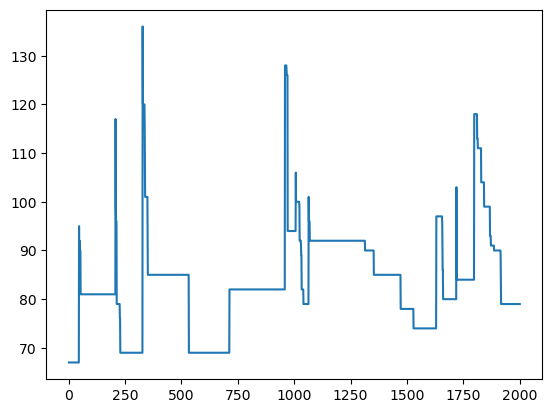

In [173]:
G_END = 2000
PROB = 0.005#より悪い結果を受ける確率
O=o-1#(o=19)操作数合計

df_best_t = pd.DataFrame({
    'xdf':np.arange(1,G_END+1),
    'ydf':np.arange(1,G_END+1)},
    index = np.arange(1,G_END+1))

for g in np.arange(1,G_END+1):

    operation_J7=best_operation_J7
    #print(operation_J7)
    orientation = random.choice([-1, 1])#方向決め
    #orientation = 1 

    if orientation == 1 :#操作後回し
        #print('操作後回し')
    
        gene_o = random.randint(1,O-1)#変わる操作の番号を決める
        #print('変わる操作の番号:',gene_o)
    
        for k in np.arange(gene_o+1,O+1):#同じジョブのP+1のプロセスの番号を探す
            if int(operation_J7.loc[k,'job'])==int(operation_J7.loc[gene_o,'job']) and int(operation_J7.loc[k,'process'])==int(operation_J7.loc[gene_o,'process'])+1:
                nearest_operation=k
                break
            if k==O:
                nearest_operation=k
            
        delta_distance = nearest_operation - gene_o - 1#後回し最大距離を決め
        #print('delta_distance:',delta_distance)
        if delta_distance == 0:
            distance=0#後回すできない
        if delta_distance > 0:
            distance = random.randint(1,delta_distance)#後回し距離を決め
        #print('distance:',distance)
    
        temporary_job=operation_J7.iloc[gene_o-1,0]#変わる操作のジョブ情報を保存
        temporary_process=operation_J7.iloc[gene_o-1,1]#変わる操作のプロセス情報を保存
        #print(temporary_job,temporary_process)
        #print('行く先:',gene_o+orientation*distance)
    
        for k in np.arange(gene_o,gene_o+orientation*distance):#新しい操作順番生成する
            operation_J7.loc[k,'job']=operation_J7.iloc[k,0]
            operation_J7.loc[k,'process']=operation_J7.iloc[k,1]
        operation_J7.loc[gene_o+orientation*distance,'job']=temporary_job
        operation_J7.loc[gene_o+orientation*distance,'process']=temporary_process
    

    if orientation == -1 :#操作前倒し
        #print('操作前倒し')
        gene_o = random.randint(2,O)#変わる操作の番号を決める
        #print('変わる操作の番号:',gene_o)
        for k in np.arange(gene_o-1,0,-1):#同じジョブのP-1のプロセスの番号を探す
            if int(operation_J7.loc[k,'job'])==int(operation_J7.loc[gene_o,'job']) and int(operation_J7.loc[k,'process'])==int(operation_J7.loc[gene_o,'process'])-1:
                nearest_operation=k
                break
            if k==1:
                nearest_operation=k
        
        delta_distance = gene_o - nearest_operation#前倒し最大距離を決め
        #print('delta_distance:',delta_distance)
        distance = random.randint(1,delta_distance)#前倒し距離を決め
        #print('distance:',distance)
    
        temporary_job=operation_J7.iloc[gene_o-1,0]#変わる操作のジョブ情報を保存
        temporary_process=operation_J7.iloc[gene_o-1,1]#変わる操作のプロセス情報を保存
        #print(temporary_job,temporary_process)
        #print('行く先:',gene_o+orientation*distance)
    
        for k in np.arange(gene_o,gene_o+orientation*distance-1,-1):#新しい操作順番生成する
            operation_J7.loc[k,'job']=operation_J7.iloc[k-2,0]
            operation_J7.loc[k,'process']=operation_J7.iloc[k-2,1]
        operation_J7.loc[gene_o+orientation*distance,'job']=temporary_job
        operation_J7.loc[gene_o+orientation*distance,'process']=temporary_process
    
    #print('新しい操作順番:\n',operation_J7)
    
    #新しい操作順番より総作業時間算出
    state_M=np.zeros(4,dtype=int)
    state_J7=np.zeros(8,dtype=int)
    check_J7=np.array([[0,0,-1],
                        [0,0,-1],
                        [0,0,-1],
                        [0,0,-1],
                        [0,0,-1],
                        [0,0,0],
                        [0,0,0],
                        [0,0,0],]) 
    
    for t in np.arange(1,LENGTH+1):
        for i in np.arange(1,o):
            job=operation_J7.iloc[i-1,0]
            #print(job)
            process=operation_J7.iloc[i-1,1]
            #print(process)
            if check_J7[job-1,process-1]==0:
                mechine=MS_J7[job-1,process-1]
                if state_M[mechine-1]==0 and state_J7[job-1]==0:
                    state_M[mechine-1]=T_J7[job-1,process-1]
                    state_J7[job-1]=T_J7[job-1,process-1]
                    check_J7[job-1,process-1]=1
                else:
                    break                
        state_M[state_M !=0] -= 1
        state_J7[state_J7 !=0] -= 1
        if np.all(check_J7!=0):
            break
    #print(check_J7,job,process)

    t=t+T_J7[job-1,process-1]

    #print('新しい操作順番時間:\n',t)
    if t<=best_t:
        best_t=t
        best_operation_J7=operation_J7

    if t>best_t:
        while random.random()<PROB:
            best_t=t
            best_operation_J7=operation_J7

    df_best_t.iloc[g-1,1]=best_t

print(g)
print(best_t)
print(best_operation_J7)
plt.plot('xdf','ydf',data=df_best_t)
plt.show
